# Billing Validity Logistic Regression

### Import Libraries to Use

In [20]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

### Create Synthetic Dataset

> Normally this would be a csv extracted from  a source like Epic or CERNER, but for purposes of protecting patient data, we will create a synthetic dataset using numpy and pandas

In [6]:
n_records = 1000
n_columns = 5
np.random.seed(42)
procedure_options = ['A', 'B', 'C', 'D']
provider_options = ['X', 'Y', 'Z']

procedure = np.random.choice(procedure_options, size=n_records)
provider = np.random.choice(provider_options, size=n_records)
amount = np.random.normal(loc=1000, scale=100, size=n_records)
duration = np.random.normal(loc=30, scale=5, size=n_records)
age = np.random.normal(loc=50, scale=10, size=n_records)

### Defining what a 'valid' or 'invalid' medical bill are.

> This part can be modified based on the needs of the business. We're using simple definitions here. 

In [7]:
def is_valid(procedure, provider, amount, duration, age):
    # The validity of a claim depends on the procedure, provider, and amount.
    if procedure == 'A' and provider == 'X' and amount > 1200:
        return 0
    if procedure == 'B' and provider == 'Y' and amount > 1000 and duration > 20:
        return 0
    if procedure == 'C' and provider == 'Z' and amount > 800 and age > 60:
        return 0
    if procedure == 'D' and provider in ['X', 'Y', 'Z'] and amount > 1500 and duration > 30 and age > 40:
        return 0
    return 1


### Vectorizing our datapoints. 

> For purposes of logistic regression, we are going to vectorize our dataset using numpy

In [10]:
is_valid = np.vectorize(is_valid)
y = is_valid(procedure, provider, amount, duration, age)
claims_data = pd.DataFrame({'procedure': procedure,
                     'provider': provider,
                     'amount': amount,
                     'duration': duration,
                     'age': age,
                     'is_valid': y})


### Encoding our dataset.

> We will now encode the dataset using 'fit_transform' to standardize it and then we will split our data into training and testing using sklearn

In [11]:
le = LabelEncoder()
claims_data['procedure'] = le.fit_transform(claims_data['procedure'])
claims_data['provider'] = le.fit_transform(claims_data['provider'])

X = claims_data.drop(['is_valid'], axis=1)
y = claims_data['is_valid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

> We will now use sklearn to perform a logistic regression to train our binary classification model to predict when a billing item is valid or not. 

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

### Assessing Our Model

> We will now assess our model by looking at the accuracy and the ROC curve. 

In [17]:
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))


Accuracy: 0.955
Precision: 0.955
Recall: 1.0
F1 Score: 0.9769820971867007


In [25]:
claims_data['predicted_validity'] = lr.predict(X)

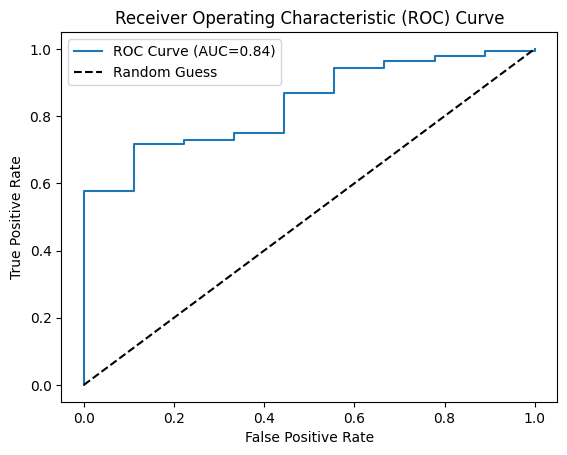

In [24]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC={auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


> Summary: Our precision, recall, F1 score indicate that this model does a decent job of predicting whether a billing item is valid or not. Additionally, the ROC Curve AUC value of 0.84 tells us this model performs extremely well and is much better than randomly guessing. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d851d776-6a92-4cfc-bca1-3e357c8b4491' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>